In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gamspec import *

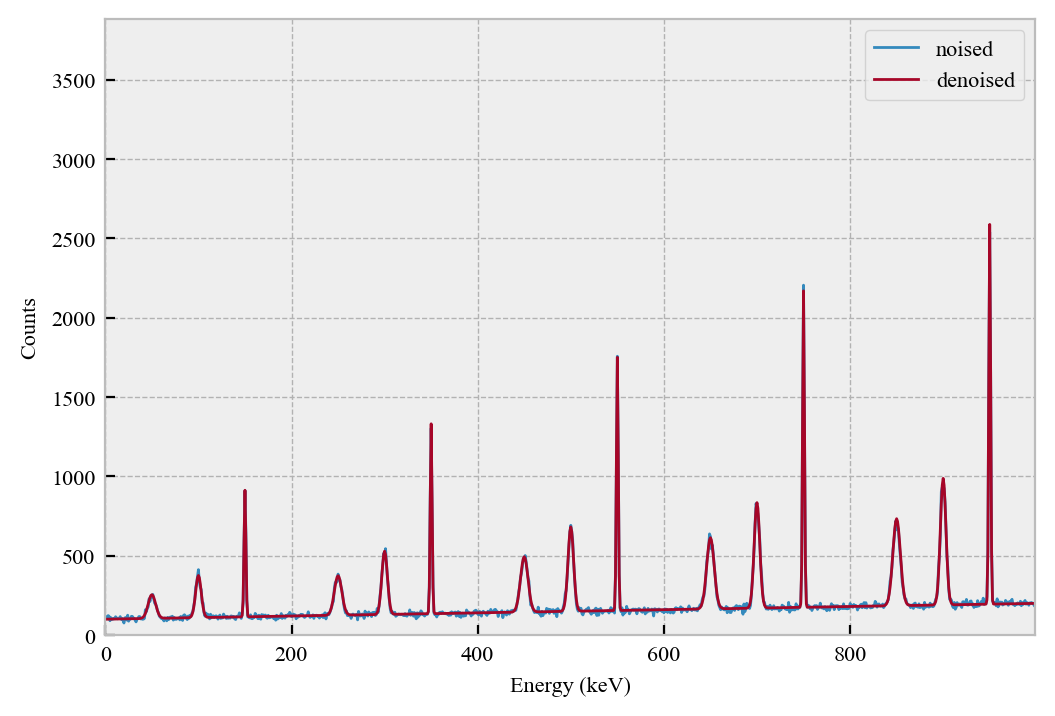

In [4]:
noised = SimulatedSpectrum(length=1000, base_intensity=100, base_function=lambda x: x, base_amplitude=100,
                           peaks_info=[[50, 4.0, 1500], [100, 3.0, 2000], [150, 1.0, 2000],
                                       [250, 4.0, 2500], [300, 3.0, 3000], [350, 1.0, 3000],
                                       [450, 4.0, 3500], [500, 3.0, 4000], [550, 1.0, 4000],
                                       [650, 4.0, 4500], [700, 3.0, 5000], [750, 1.0, 5000],
                                       [850, 4.0, 5500], [900, 3.0, 6000], [950, 1.0, 6000]], label="noised")
denoised = SimulatedSpectrum(length=1000, base_intensity=100, base_function=lambda x: x, base_amplitude=100,
                             peaks_info=[[50, 4.0, 1500], [100, 3.0, 2000], [150, 1.0, 2000],
                                       [250, 4.0, 2500], [300, 3.0, 3000], [350, 1.0, 3000],
                                       [450, 4.0, 3500], [500, 3.0, 4000], [550, 1.0, 4000],
                                       [650, 4.0, 4500], [700, 3.0, 5000], [750, 1.0, 5000],
                                       [850, 4.0, 5500], [900, 3.0, 6000], [950, 1.0, 6000]], base_noised=False, label="denoised")
noised.plot()
denoised.plot()
plt.legend()

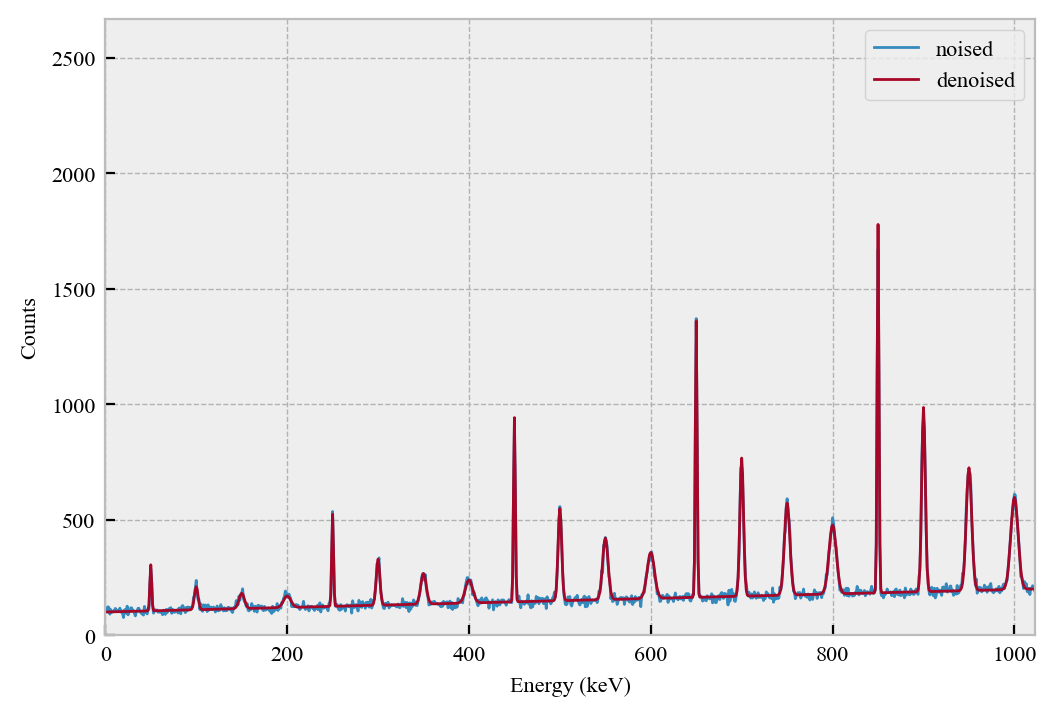

In [5]:
noised = SimulatedSpectrum(length=1024, base_intensity=100, base_function=lambda x: x, base_amplitude=100,
                           peaks_info=[[50, 1.0, 500], [100, 2.0, 500], [150, 3.0, 500], [200, 4.0, 500],
                                       [250, 1.0, 1000], [300, 2.0, 1000], [350, 3.0, 1000], [400, 4.0, 1000],
                                       [450, 1.0, 2000], [500, 2.0, 2000], [550, 3.0, 2000], [600, 4.0, 2000],
                                       [650, 1.0, 3000], [700, 2.0, 3000], [750, 3.0, 3000], [800, 4.0, 3000],
                                       [850, 1.0, 4000], [900, 2.0, 4000], [950, 3.0, 4000], [1000, 4.0, 4000]], label="noised")
denoised = SimulatedSpectrum(length=1024, base_intensity=100, base_function=lambda x: x, base_amplitude=100,
                             peaks_info=[[50, 1.0, 500], [100, 2.0, 500], [150, 3.0, 500], [200, 4.0, 500],
                                       [250, 1.0, 1000], [300, 2.0, 1000], [350, 3.0, 1000], [400, 4.0, 1000],
                                       [450, 1.0, 2000], [500, 2.0, 2000], [550, 3.0, 2000], [600, 4.0, 2000],
                                       [650, 1.0, 3000], [700, 2.0, 3000], [750, 3.0, 3000], [800, 4.0, 3000],
                                       [850, 1.0, 4000], [900, 2.0, 4000], [950, 3.0, 4000], [1000, 4.0, 4000]], base_noised=False, label="denoised")
noised.plot()
denoised.plot()
plt.legend()

In [6]:
smoothers = [
    Passer(),

    CentroidSmoother(1),
    CentroidSmoother(2),
    CentroidSmoother(3),

    SavitzkySmoother(2, 2),
    SavitzkySmoother(2, 3),
    SavitzkySmoother(2, 4),
    SavitzkySmoother(4, 3),
    SavitzkySmoother(4, 4),
    SavitzkySmoother(4, 5),
    
    WaveletSmoother(mode='soft', wavelet='dmey', order=3),
    WaveletSmoother(mode='quadratic-soft', wavelet='dmey', order=3),
    
    TranslationInvarianceWaveletSmoother(mode='soft', wavelet='dmey', order=3, step=20),
    TranslationInvarianceWaveletSmoother(mode='quadratic-soft', wavelet='dmey', order=3, step=20),
    TranslationInvarianceWaveletSmoother(mode='soft', wavelet='dmey', order=4, step=20),
    TranslationInvarianceWaveletSmoother(mode='quadratic-soft', wavelet='dmey', order=4, step=20),
    TranslationInvarianceWaveletSmoother(mode='soft', wavelet='dmey', order=5, step=20),
    TranslationInvarianceWaveletSmoother(mode='quadratic-soft', wavelet='dmey', order=5, step=20),
]


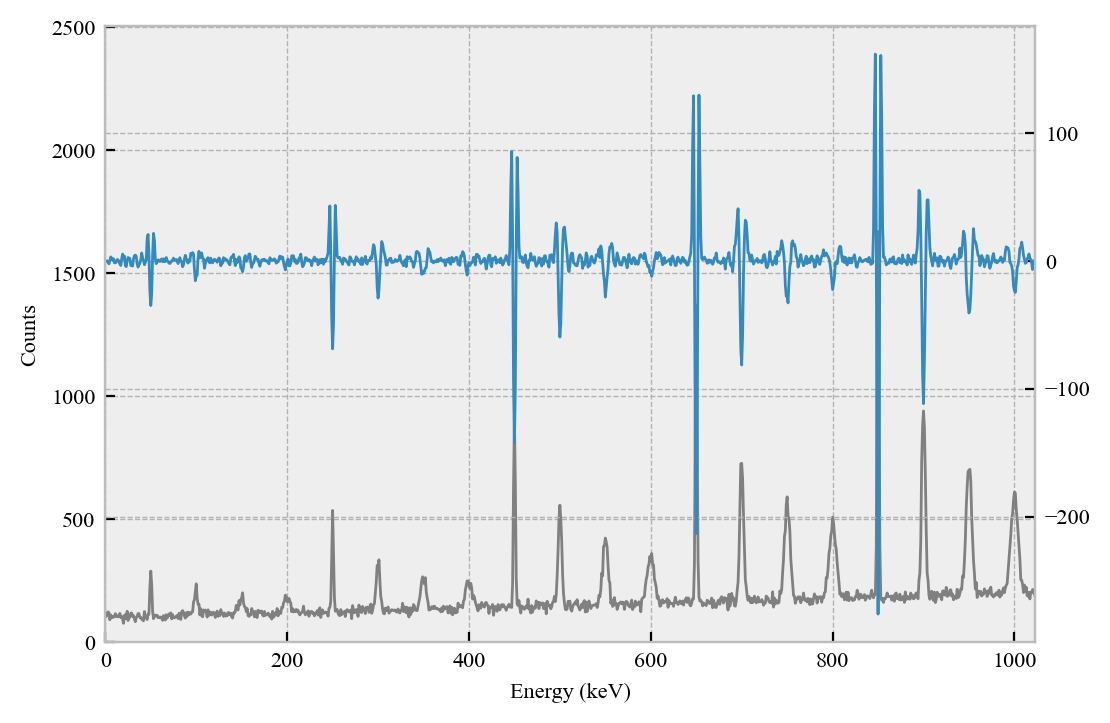

In [11]:
noised.plot(color='gray')

plt.twinx()

# plt.plot(np.abs(second_derivative))
plt.plot(Spectrum(Differential(noised, 2, 3, 2)[0]))

# smoothed = smoothers[1](noised)
# normalized = (smoothed - noised) / noised**0.5
# # second_derivative = Differential(noised, 4, 3, 2)[0]
# plt.plot(np.abs(Differential(smoothed, 4, 4, 2)[0] / smoothed))


In [8]:
class SmootherEvaluator:
    
    def __init__(self):
        self.average_area_calculator = AverageAreaCalculator(10)
        self.fit_area_calculator = RegionPeakFitter()

    def evaluate(self, smoothed, noised, denoised):
        snr_reduction = self.snr_reduction(smoothed, noised)
        # snr_reduction = self.new_snr_reduction(smoothed, noised, denoised)
        ph_ratios = self.peak_height_ratio(smoothed, noised)
        pa_ratios = self.peak_area_ratio(smoothed, denoised)
        mse_with_noised = self.rmse_with_noised(smoothed, noised),
        mse_with_denoised = self.rmse_with_denoised(smoothed, denoised),
        
        val ={
            'snr_reduction': snr_reduction,
            'ph_ratios': ph_ratios.mean(),
            'pa_ratios': pa_ratios.mean(),
            # 'rmse_with_noised': mse_with_noised[0],
            'rmse_with_denoised': mse_with_denoised[0],
            'factor': self.factor(smoothed, noised),
            'factor2': self.factor2(smoothed, noised),
        }
        return val

    def snr_reduction(self, smoothed, noised):
        noise = noised - smoothed
        return (noise**2).sum() / (noised**2).sum()

    # def new_snr_reduction(self, smoothed, noised, denoised):
    #     return (np.abs((smoothed-denoised)/(noised-denoised)) * denoised**0.5).mean()

    def rmse_with_noised(self, smoothed, noised) -> float:
        return ((smoothed - noised)**2).mean()**0.5

    def rmse_with_denoised(self, smoothed, denoised):
        return ((smoothed - denoised)**2).mean()**0.5

    def peak_height_ratio(self, smoothed, denoised):
        ph_ratios = []
        for i, region in enumerate(denoised.regions):
            for j, peak in enumerate(region.peaks):
                ph_ratio = smoothed[peak['location']]/denoised[peak['location']]
                ph_ratios.append(ph_ratio)
        return np.array(ph_ratios)

    def peak_area_ratio(self, smoothed, denoised):
        calculated_smoothed = self.average_area_calculator(smoothed)
        calculated_denoised = self.average_area_calculator(denoised)

        pa_ratios = []
        for i, region in enumerate(calculated_smoothed.regions):
            for j, peak in enumerate(region.peaks):
                pa_ratio = calculated_smoothed.regions[i].peaks[j]['area']/calculated_denoised.regions[i].peaks[j]['area']
                pa_ratios.append(pa_ratio)
        return np.array(pa_ratios)

    def factor(self, smoothed, noised):
        normalized = (smoothed - noised) / noised**0.5
        chi_square = ((smoothed - noised)**2 / noised).mean()
        # r_square = ((smoothed-noised)**2).mean() / ((noised-noised.mean())**2).mean()
        # return np.std(normalized) / np.abs(1-chi_square)
        return chi_square

    def factor2(self, smoothed, noised):
        normalized = (smoothed - noised) / noised**0.5
        second_derivative = Differential(noised, 4, 3, 2)[0]
        return  np.abs(normalized * second_derivative).mean()

eva = SmootherEvaluator()

In [9]:
results = []
for smoother in smoothers:
    smoothed = smoother(noised)
    val = {'name': smoother.label}
    val.update(eva.evaluate(smoothed, noised, denoised))
    results.append(val)
results = pd.DataFrame(results)
results.to_excel('results.xlsx')
results

AttributeError: 'Region' object has no attribute '_peaks'

d:\Conda\envs\gamut\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


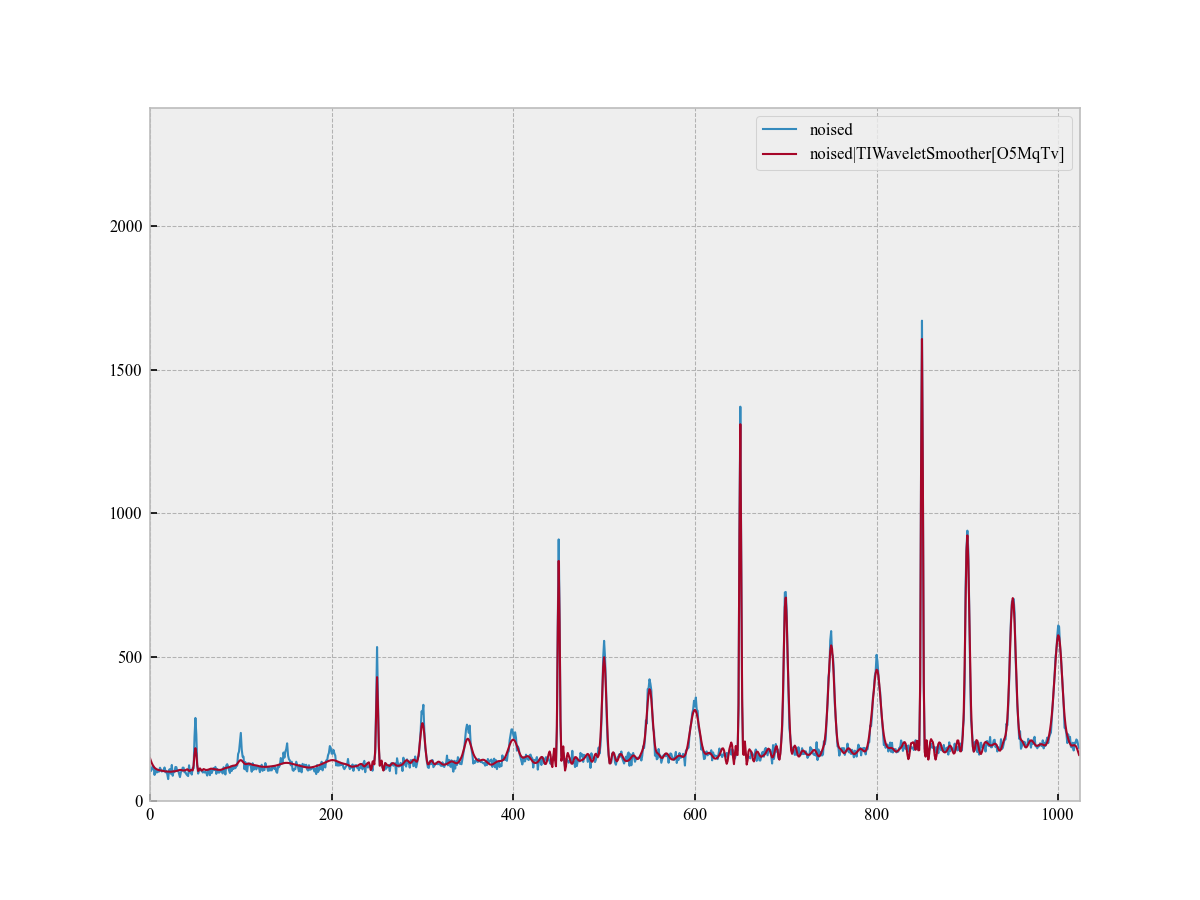

In [ ]:
%matplotlib widget
plt.figure(figsize=(8, 6), dpi=150)
noised.plot()
# for smoother in smoothers[4:5]:
#     smoothed = smoother(noised)
#     smoothed.plot()
# for smoother in smoothers[7:8]:
#     smoothed = smoother(noised)
#     smoothed.plot()
for smoother in smoothers[-1:]:
    smoothed = smoother(noised)
    smoothed.plot()
plt.legend()
plt.show()